 ---
# Data Challenge ULACIT 2021
#### Análisis de los datos brindados por el Poder Judicial con respecto a las licitaciones y contrataciones realizadas entre 2016 y 2020
---
Estudiantes: 
 
* Jeffry Luque
* Sofía Ramírez
* Luis Valverde

Grupo: 8

## - Análisis de datos de las licitaciones publicas*
>Trabajo realizado para obtener información sobre los procesos de licitación en el Poder Judicial , en busca de mejoras para beneficiar a la institución en sus procesos de compra y contratación en sus procesos de ejecución.

---

## Datos Abiertos Poder Judicial (PJ)

Para proponer una solución o mejoras para los procesos de licitación, compras o adquisiones de servicios en el Poder Judicial se realizará un estudio de los datos suministrados por la misma institución, con respecto a la compra de servicios y bienes en los años 2016,2017,2018,2019 y 2020, centrando la mayoría de datos en los obtenidos en el 2016 y 2020.

Una vez con los datos, se procederá a realizar comparaciones y análisis del proceso, para veririficar o no el buen desempeño en las licitaciones.

### Partida

Como primer acercamiento se parte de los datos del 2016, para luego realizar una comparación con los siguientes años. Se comienza con la importación de las librerías a utilizar en python, se llama los archivos iniciales a analizar, y se proceden a conocer las columnas que nos brindan estos archivos: 

In [1]:
import pandas as pd
import requests

# Se importan los archivos a utilizar.

oferente = 0
datos16 = pd.read_excel('2016_Poder_Judicial_CR.xls')
parties16  = pd.read_csv('parties.csv') # Se accede a la lista de los oferentes de cada actividad.

datos20 = pd.read_excel('2020_Poder_Judicial_CR.xls')
parties20  = pd.read_csv('parties20.csv')

# Muestro las columnas de los archivos.
print("Columnas de Empresas Oferentes: ")
print(list(datos16.columns))
print("\n Columnas de releases: ")
print(list(parties16.columns))

Columnas de Empresas Oferentes: 
['ocid', 'id', 'date', 'tag', 'initiationType', 'buyer/id', 'buyer/name', 'tender/id', 'tender/title', 'tender/description', 'tender/status', 'tender/procuringEntity/id', 'tender/procuringEntity/name', 'tender/value/amount', 'tender/value/currency', 'tender/procurementMethod', 'tender/mainProcurementCategory', 'tender/awardCriteria', 'tender/submissionMethod', 'tender/tenderPeriod/startDate', 'tender/tenderPeriod/endDate', 'tender/enquiryPeriod/startDate', 'tender/enquiryPeriod/endDate', 'tender/awardPeriod/startDate', 'tender/awardPeriod/endDate', 'language', 'planning/budget/description']

 Columnas de releases: 
['ocid', 'id', 'parties/0/id', 'parties/0/name', 'parties/0/identifier/id', 'parties/0/identifier/legalName', 'parties/0/address/streetAddress', 'parties/0/roles', 'parties/0/contactPoint/email', 'parties/0/contactPoint/telephone', 'parties/0/contactPoint/faxNumber', 'parties/0/contactPoint/name', 'parties/0/address/postalCode']


### Funciones

Se crea una función para enviar los oferentes que se desean analizar de acuerdo al año, con respecto a las actividades generadas en la licitación, con esto se busca encontrar cuantas empresas son oferentes en las distintas actividades que el Poder Judicial abre el proceso de licitación y contratación, se desea analizar si hay una correlación entre pocas empresas oferentes con fechas cortas habilitadas para ofertar, es decir que por ejemplo solo hayan 2 días para ofertar afecte que pocas empresas participen.

Primero vemos como se muestra en los datos del PJ las actividades a realizar:

In [2]:
# Se muestra los id relacionados a las actividades del Poder Judicial
print(parties16["ocid"])

0       ocds-fnha3a-000001-2016
1       ocds-fnha3a-000001-2016
2       ocds-fnha3a-000001-2016
3       ocds-fnha3a-000001-2016
4       ocds-fnha3a-000001-2016
                 ...           
8936    ocds-fnha3a-003134-2016
8937    ocds-fnha3a-003134-2016
8938    ocds-fnha3a-003135-2016
8939    ocds-fnha3a-003135-2016
8940    ocds-fnha3a-003135-2016
Name: ocid, Length: 8941, dtype: object


Cada actividad tiene la forma "ocds-fnha3a-000001-2016" donde la variante en cada actividad es la secuencia númerica -000001- la cual utilizaremos para los detalles a evaluar. 

Notamos que en el 2016, por ejemplo, se desarrollaron 8941 actividades que contaron con al menos una empresa oferente, los String generados son similares excepto la numeración final, por lo que procedemos con la siguiente función para recibir los datos, y esta devuelva una lista con la cantidad de oferentes por cada actividad.


In [3]:
# Función para recibir una lista de oferentes asociados al ocid del documento. 

def cantidad_Oferentes(parties):
    id_Oferente = list(parties["ocid"])
    oferente = 0
    actividad = []
    id_num_of = []
    array =[]
    listaN =[]
# Recorremos la lista y solo tomamos la parte númerica.
    for n in id_Oferente:
        num = int(n[13:18])
        id_num_of.append(num)
    m =1

    data = sorted(id_num_of)
    aux = id_num_of[0]       # Se iguala al primer elemento de la lista
    count = 0                # se inicia el contador en 0
    for i in data:
        if aux == i:
          count += 1
        else:
          array.append(count)
          count = 1
          aux = i
    array.append(count) 
    return array            # Devuel el arrray con la cantidad de oferentes.


In [4]:
# Creamos una lista con los oferentes del 2016
parties_List16 = list(datos16["ocid"])

# Creamos una lista con los oferentes del 2020
parties_List20 = list(datos20["ocid"])

A continuación se llama la función creada con los oferentes del año a analizar, además creamos un diccionario para hacer una correlación con los keys de los id de las actividades del PJ y la cantidad de oferentes encontrados en cada actividad.

In [5]:
oferentes16 = cantidad_Oferentes(parties16)
oferentes20 = cantidad_Oferentes(parties20)
dictionary16 = {}
dictionary20 = {}
# Oferentes del año 2016
for n in range(0,len(oferentes16)):
    dictionary16[parties_List16[n]] = oferentes16[n]

# Oferentes del año 2020
for n in range(0,len(oferentes20)):
    dictionary20[parties_List20[n]] = oferentes20[n]

A continuación se muestra cada actividad del 2016 con la cantidad de empresas oferentes, o que se hicieron presentes en el proceso de licitación o venta de bienes y servicios:

In [6]:
print(" Se muestran la cantidad de oferentes según la actividad realizada en el 2016: \n")

for n in range(0, len(oferentes16)):
    print("Cantidad de oferentes en la actividad ",parties_List16[n], " son", dictionary16[parties_List16[n]])

 Se muestran la cantidad de oferentes según la actividad realizada en el 2016: 

Cantidad de oferentes en la actividad  ocds-fnha3a-000001-2016  son 7
Cantidad de oferentes en la actividad  ocds-fnha3a-000002-2016  son 19
Cantidad de oferentes en la actividad  ocds-fnha3a-000004-2016  son 2
Cantidad de oferentes en la actividad  ocds-fnha3a-000005-2016  son 2
Cantidad de oferentes en la actividad  ocds-fnha3a-000006-2016  son 3
Cantidad de oferentes en la actividad  ocds-fnha3a-000007-2016  son 2
Cantidad de oferentes en la actividad  ocds-fnha3a-000008-2016  son 6
Cantidad de oferentes en la actividad  ocds-fnha3a-000009-2016  son 3
Cantidad de oferentes en la actividad  ocds-fnha3a-000010-2016  son 2
Cantidad de oferentes en la actividad  ocds-fnha3a-000011-2016  son 4
Cantidad de oferentes en la actividad  ocds-fnha3a-000012-2016  son 11
Cantidad de oferentes en la actividad  ocds-fnha3a-000013-2016  son 5
Cantidad de oferentes en la actividad  ocds-fnha3a-000015-2016  son 3
Cantida

In [7]:
print(" Se muestran la cantidad de oferentes según la actividad realizada en el 2020: \n")

for n in range(0, len(oferentes20)):
    print("Cantidad de oferentes en la actividad ",parties_List20[n], " son", dictionary20[parties_List20[n]])

 Se muestran la cantidad de oferentes según la actividad realizada en el 2020: 

Cantidad de oferentes en la actividad  ocds-fnha3a-000001-2020  son 4
Cantidad de oferentes en la actividad  ocds-fnha3a-000002-2020  son 2
Cantidad de oferentes en la actividad  ocds-fnha3a-000003-2020  son 2
Cantidad de oferentes en la actividad  ocds-fnha3a-000004-2020  son 4
Cantidad de oferentes en la actividad  ocds-fnha3a-000005-2020  son 10
Cantidad de oferentes en la actividad  ocds-fnha3a-000006-2020  son 9
Cantidad de oferentes en la actividad  ocds-fnha3a-000008-2020  son 3
Cantidad de oferentes en la actividad  ocds-fnha3a-000009-2020  son 2
Cantidad de oferentes en la actividad  ocds-fnha3a-000014-2020  son 2
Cantidad de oferentes en la actividad  ocds-fnha3a-000015-2020  son 2
Cantidad de oferentes en la actividad  ocds-fnha3a-000016-2020  son 3
Cantidad de oferentes en la actividad  ocds-fnha3a-000017-2020  son 2
Cantidad de oferentes en la actividad  ocds-fnha3a-000018-2020  son 2
Cantidad

Para analizarlo gráficamente se procede a realizar un gráfico donde proyectemos la cantidad de oferentes entre las actividades generadas del Poder Juducial en el año 2016 y 2020.

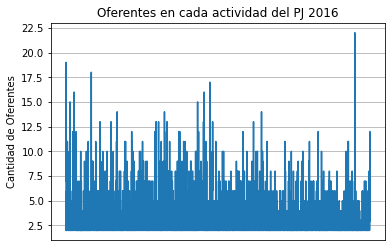

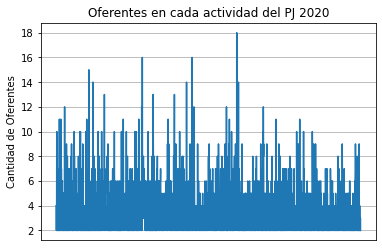

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt 

plt.title('Oferentes en cada actividad del PJ 2016')
x = list(dictionary16.keys())
y = list(dictionary16.values())
plt.grid(True)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)

plt.xlabel("Actividades de licitación")
plt.ylabel("Cantidad de Oferentes")
plt.plot(x, y)
plt.show()
plt.clf()

# Gráfico del 2020
plt.title('Oferentes en cada actividad del PJ 2020')
x = list(dictionary20.keys())
y = list(dictionary20.values())
plt.grid(True)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)

plt.xlabel("Actividades de licitación")
plt.ylabel("Cantidad de Oferentes")
plt.plot(x, y)
plt.show()
plt.clf()

Partiendo del objetivo principal, que es el análisis de los oferentes por cada actividad ahora se centrará la programación y análisis para identificar cuantos días en promedio una licitación está abierta, es decir, cuando una empresa aún puede participar y ofertar, para verificar o no si los pocos o muchos días que permanezcan abiertos afecta directamente  la cantidad de empresas. 

A continuación con los dicionarios creados enlistamos los argumentos y valores con el fin de verificar cuantas actividades contienen tres o menos oferentes, considerando el estudio que 3 oferentes es un número bajo para una licitación pública.

In [9]:
key_list16 = list(dictionary16.keys())
val_list16 = list(dictionary16.values())

key_list20 = list(dictionary20.keys())
val_list20 = list(dictionary20.values())

In [36]:
key = []

# Se recorre el dictionario para verificar cuantos tienen 3 o menos oferentes en l 2016 y los mostramos en pantalla.

print("Se muestran las actividades que tienen menos de 4 oferentes, sin incluir el 4, según su ID \n")
for k, value in dictionary16.items():    
     if value <= 3:
        key.append(k)
        print("La actividad: ", k, "tiene menos de 4 oferentes");

   

Se muestran las actividades que tienen menos de 4 oferentes, sin incluir el 4, según su ID 

La actividad:  ocds-fnha3a-000004-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000005-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000006-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000007-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000009-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000010-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000015-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000021-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000022-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000023-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000025-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000026-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000027-2016 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000028-2016 tiene meno

In [35]:
keyM = []

# Se recorre el dictionario para verificar cuantos tienen 3 o menos oferentes en l 2016 y los mostramos en pantalla.

print("Se muestran las actividades que tienen menos de 4 oferentes, sin incluir el 4, según su ID \n")
for k, value in dictionary16.items():    
     if value > 3:
        keyM.append(k)
        print("La actividad: ", k, "tiene más  de 3 oferentes");


Se muestran las actividades que tienen menos de 4 oferentes, sin incluir el 4, según su ID 

La actividad:  ocds-fnha3a-000001-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000002-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000008-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000011-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000012-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000013-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000016-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000017-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000018-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000019-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000020-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000024-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000029-2016 tiene más  de 3 oferentes
La actividad:  ocds-fnha3a-000030-2016 tiene más  de 3 oferent

In [12]:
key20 = []

# Se recorre el dictionario para verificar cuantos tienen 3 o menos oferentes en el 2020 y los mostramos en pantalla.

print("Se muestran las actividades que tienen menos de 4 oferentes, sin incluir el 4, según su ID \n")
for k, value in dictionary20.items():    
     if value <= 3:
        key20.append(k)
        print("La actividad: ", k, "tiene menos de 4 oferentes");



Se muestran las actividades que tienen menos de 4 oferentes, sin incluir el 4, según su ID 

La actividad:  ocds-fnha3a-000002-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000003-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000008-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000009-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000014-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000015-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000016-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000017-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000018-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000021-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000022-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000023-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000024-2020 tiene menos de 4 oferentes
La actividad:  ocds-fnha3a-000026-2020 tiene meno

In [13]:
key20M = []

# Se recorre el dictionario para verificar cuantos tienen 3 o menos oferentes en el 2020 y los mostramos en pantalla.

print("Se muestran las actividades que tienen menos de 4 oferentes, sin incluir el 4, según su ID \n")
for k, value in dictionary20.items():    
     if value > 3:
        key20M.append(k)
        print("La actividad: ", k, "tiene Más de 4 oferentes");


Se muestran las actividades que tienen menos de 4 oferentes, sin incluir el 4, según su ID 

La actividad:  ocds-fnha3a-000001-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000004-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000005-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000006-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000019-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000028-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000030-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000031-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000032-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000037-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000040-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000041-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000042-2020 tiene Más de 4 oferentes
La actividad:  ocds-fnha3a-000045-2020 tiene Más de 4 oferentes
La activida

Una vez con la lista de todas las actividades con tres oferentes o menos, se procede a verificar las fechas asociadas, la fecha final e inicial del proceso donde la licitación estuvo abierta, esto permitirá después que sean trabajados los datos para encontrar el promedio de días. 

Y así acercarnos al análisis requerido.

In [14]:
#dictionario: {key, [init_date, final_date]}
dict2 = {}
n = 0
for k, value in dictionary16.items():    
    if value <= 3:
        aux = []
        
        for i in range(n, datos16["ocid"].size):
            if k.lower() in datos16["ocid"][i].lower():
                aux.append(datos16["tender/tenderPeriod/startDate"][i][0:10])
                aux.append(datos16["tender/tenderPeriod/endDate"][i][0:10])
                dict2[k] = aux
                aux = []
                n = i
print(" Actividades con las fechas asociadas en el 2016: \n")
for k, value in dict2.items():
    print("Actividad: ",k, "/ Fecha inicio: ", value[0], "/ fecha final: ",value[1], "/")

 Actividades con las fechas asociadas en el 2016: 

Actividad:  ocds-fnha3a-000004-2016 / Fecha inicio:  2016-03-15 / fecha final:  2016-03-29 /
Actividad:  ocds-fnha3a-000005-2016 / Fecha inicio:  2016-01-27 / fecha final:  2016-02-02 /
Actividad:  ocds-fnha3a-000006-2016 / Fecha inicio:  2016-01-18 / fecha final:  2016-01-25 /
Actividad:  ocds-fnha3a-000007-2016 / Fecha inicio:  2016-01-27 / fecha final:  2016-02-03 /
Actividad:  ocds-fnha3a-000009-2016 / Fecha inicio:  2016-03-02 / fecha final:  2016-03-08 /
Actividad:  ocds-fnha3a-000010-2016 / Fecha inicio:  2016-01-18 / fecha final:  2016-02-01 /
Actividad:  ocds-fnha3a-000015-2016 / Fecha inicio:  2016-04-20 / fecha final:  2016-06-01 /
Actividad:  ocds-fnha3a-000021-2016 / Fecha inicio:  1900-01-01 / fecha final:  1900-01-01 /
Actividad:  ocds-fnha3a-000022-2016 / Fecha inicio:  2016-01-15 / fecha final:  2016-01-20 /
Actividad:  ocds-fnha3a-000023-2016 / Fecha inicio:  2016-01-19 / fecha final:  2016-01-26 /
Actividad:  ocds-f

In [15]:
#dictionario: {key, [init_date, final_date]}
dict2M = {}
n = 0
for k, value in dictionary16.items():    
    if value > 3:
        aux = []
        
        for i in range(n, datos16["ocid"].size):
            if k.lower() in datos16["ocid"][i].lower():
                aux.append(datos16["tender/tenderPeriod/startDate"][i][0:10])
                aux.append(datos16["tender/tenderPeriod/endDate"][i][0:10])
                dict2M[k] = aux
                aux = []
                n = i
print(" Actividades con las fechas asociadas en el 2016: \n")
for k, value in dict2M.items():
    print("Actividad: ",k, "/ Fecha inicio: ", value[0], "/ fecha final: ",value[1], "/")

 Actividades con las fechas asociadas en el 2016: 

Actividad:  ocds-fnha3a-000001-2016 / Fecha inicio:  2016-05-06 / fecha final:  2016-06-07 /
Actividad:  ocds-fnha3a-000002-2016 / Fecha inicio:  1900-01-01 / fecha final:  1900-01-01 /
Actividad:  ocds-fnha3a-000008-2016 / Fecha inicio:  2016-01-11 / fecha final:  2016-01-12 /
Actividad:  ocds-fnha3a-000011-2016 / Fecha inicio:  2016-02-02 / fecha final:  2016-02-05 /
Actividad:  ocds-fnha3a-000012-2016 / Fecha inicio:  2016-02-09 / fecha final:  2016-02-16 /
Actividad:  ocds-fnha3a-000013-2016 / Fecha inicio:  2017-03-07 / fecha final:  2017-04-24 /
Actividad:  ocds-fnha3a-000016-2016 / Fecha inicio:  2016-06-08 / fecha final:  2016-07-13 /
Actividad:  ocds-fnha3a-000017-2016 / Fecha inicio:  2016-05-26 / fecha final:  2016-06-23 /
Actividad:  ocds-fnha3a-000018-2016 / Fecha inicio:  1900-01-01 / fecha final:  1900-01-01 /
Actividad:  ocds-fnha3a-000019-2016 / Fecha inicio:  2016-03-10 / fecha final:  2016-04-22 /
Actividad:  ocds-f

In [16]:
#dictionario: {key, [init_date, final_date]}
dict3 = {}
n = 0
for k, value in dictionary20.items():    
    if value <= 3:
        aux = []
        
        for i in range(n, datos20["ocid"].size):
            if k.lower() in datos20["ocid"][i].lower():
                aux.append(datos20["tender/tenderPeriod/startDate"][i][0:10])
                aux.append(datos20["tender/tenderPeriod/endDate"][i][0:10])
                dict3[k] = aux
                aux = []
                n = i
print(" Actividades con las fechas asociadas en el 2020: \n")
for k, value in dict3.items():
    print("Actividad: ",k, "/ Fecha inicio: ", value[0], "/ fecha final: ",value[1], "/")

 Actividades con las fechas asociadas en el 2020: 

Actividad:  ocds-fnha3a-000002-2020 / Fecha inicio:  2020-01-06 / fecha final:  2020-01-06 /
Actividad:  ocds-fnha3a-000003-2020 / Fecha inicio:  1900-01-01 / fecha final:  1900-01-01 /
Actividad:  ocds-fnha3a-000008-2020 / Fecha inicio:  2020-03-04 / fecha final:  2020-03-11 /
Actividad:  ocds-fnha3a-000009-2020 / Fecha inicio:  2020-03-02 / fecha final:  2020-03-11 /
Actividad:  ocds-fnha3a-000014-2020 / Fecha inicio:  2020-01-24 / fecha final:  2020-01-27 /
Actividad:  ocds-fnha3a-000015-2020 / Fecha inicio:  2020-01-24 / fecha final:  2020-01-24 /
Actividad:  ocds-fnha3a-000016-2020 / Fecha inicio:  2020-01-24 / fecha final:  2020-01-24 /
Actividad:  ocds-fnha3a-000017-2020 / Fecha inicio:  2020-01-27 / fecha final:  2020-01-27 /
Actividad:  ocds-fnha3a-000018-2020 / Fecha inicio:  2020-01-27 / fecha final:  2020-01-27 /
Actividad:  ocds-fnha3a-000021-2020 / Fecha inicio:  2020-01-27 / fecha final:  2020-01-27 /
Actividad:  ocds-f

In [17]:
#dictionario: {key, [init_date, final_date]}
dict3M = {}
n = 0
for k, value in dictionary20.items():    
    if value > 3:
        aux = []
        
        for i in range(n, datos20["ocid"].size):
            if k.lower() in datos20["ocid"][i].lower():
                aux.append(datos20["tender/tenderPeriod/startDate"][i][0:10])
                aux.append(datos20["tender/tenderPeriod/endDate"][i][0:10])
                dict3M[k] = aux
                aux = []
                n = i
print(" Actividades con las fechas asociadas en el 2020: \n")
for k, value in dict3M.items():
    print("Actividad: ",k, "/ Fecha inicio: ", value[0], "/ fecha final: ",value[1], "/")

 Actividades con las fechas asociadas en el 2020: 

Actividad:  ocds-fnha3a-000001-2020 / Fecha inicio:  2020-01-06 / fecha final:  2020-01-06 /
Actividad:  ocds-fnha3a-000004-2020 / Fecha inicio:  2020-04-29 / fecha final:  2020-05-05 /
Actividad:  ocds-fnha3a-000005-2020 / Fecha inicio:  2020-02-28 / fecha final:  2020-03-04 /
Actividad:  ocds-fnha3a-000006-2020 / Fecha inicio:  1900-01-01 / fecha final:  1900-01-01 /
Actividad:  ocds-fnha3a-000019-2020 / Fecha inicio:  2020-01-27 / fecha final:  2020-01-27 /
Actividad:  ocds-fnha3a-000028-2020 / Fecha inicio:  2020-01-27 / fecha final:  2020-01-29 /
Actividad:  ocds-fnha3a-000030-2020 / Fecha inicio:  2020-01-28 / fecha final:  2020-01-30 /
Actividad:  ocds-fnha3a-000031-2020 / Fecha inicio:  2020-01-28 / fecha final:  2020-01-31 /
Actividad:  ocds-fnha3a-000032-2020 / Fecha inicio:  2020-01-29 / fecha final:  2020-02-05 /
Actividad:  ocds-fnha3a-000037-2020 / Fecha inicio:  2020-01-29 / fecha final:  2020-01-30 /
Actividad:  ocds-f

### Fechas

Con los datos a analizar, por ejemplo 2016, se analizarán las actividades que cuentan con tres o menos oferentes, se visualizarán las fechas en la que las licitaciones estaban abiertas, es decir, que las empresas podían participar para la venta o contratación.

Primero vemos la tabla general, con las primeras tres actividades, para conocer los datos proporcionados, en la columna "tender/tenderPeriod/startDate" se encuentra la fecha donde la licitación dió inicio, y en "tender/tenderPeriod/endDate	" finalizó. 


Conociendo esto nos permitirá trabajar con las fechas y así encontrar los promedios con las actividades que contaron con menos do 3 oferentes.

In [18]:

# Se muestra todas las columnas de los datos del 2016 para los primeros 3 valores
print( " Se ejemplifica la visualización de los datos del año 2016")
datos16.head(3)

 Se ejemplifica la visualización de los datos del año 2016


,ocid,id,date,tag,initiationType,buyer/id,buyer/name,tender/id,tender/title,tender/description,...,tender/awardCriteria,tender/submissionMethod,tender/tenderPeriod/startDate,tender/tenderPeriod/endDate,tender/enquiryPeriod/startDate,tender/enquiryPeriod/endDate,tender/awardPeriod/startDate,tender/awardPeriod/endDate,language,planning/budget/description
0,ocds-fnha3a-000001-2016,2016LN-000001-PROV,2016-01-07T10:54:00-06:00,tender,tender,2-300-042155,Corte Suprema de Justicia Poder Judicial,000001-2016,Compra de LLantas y baterías según demanda,Compra de LLantas y baterías según demanda,...,ratedCriteria,inPerson,2016-05-06T00:00:00-06:00,2016-06-07T10:00:00-06:00,2016-05-06T00:00:00-06:00,2016-06-07T10:00:00-06:00,2016-06-07T10:00:00-06:00,2016-08-10T00:00:00-06:00,es,NaN
1,ocds-fnha3a-000002-2016,2016CD-000001-PROVCD,2016-01-07T13:16:00-06:00,tender,tender,2-300-042155,Corte Suprema de Justicia Poder Judicial,000002-2016,"Reparación de canoas, precintas, aleros y pint...","Reparación de canoas, precintas, aleros y pint...",...,ratedCriteria,inPerson,1900-01-01T00:00:00-06:00,1900-01-01T00:00:00-06:00,1900-01-01T00:00:00-06:00,1900-01-01T00:00:00-06:00,1900-01-01T00:00:00-06:00,1900-01-01T00:00:00-06:00,es,NaN
2,ocds-fnha3a-000004-2016,2016CD-000003-PROVCD,2016-01-07T15:16:00-06:00,tender,tender,2-300-042155,Corte Suprema de Justicia Poder Judicial,000004-2016,"Construcción de aceras, en el costado sur, nor...","Construcción de aceras, en el costado sur, nor...",...,ratedCriteria,inPerson,2016-03-15T15:26:43-06:00,2016-03-29T10:00:00-06:00,2016-03-15T15:26:43-06:00,2016-03-29T10:00:00-06:00,2016-03-29T10:00:00-06:00,2016-04-12T00:00:00-06:00,es,Múltiples requisiciones


Con el siguiente código logramos obtener los días netos de cada actividad, es decir cuantos días permaneció abierta la licitación pública del Poder Judicial.

Se utilizó la librería datetime para manejar las fechas. Trabajamos con el dato suministrado por los archivos, no obstante en el código anterior, cuando creamos el dictionario logramos guardar las fechas de: "2016-03-15T15:26:43-06:00	" a solamente "2016-03-15", lo que nos permite un mejor manejo de los datos.

Al realizar el análisis encontramos que algunos días daban negativos, otros daban por encima de los 300 días, incluso arriba de los 40.000 días, verificando los datos se logró observar que esos errores se debían a la mala colocación de las fechas, o fechas por defecto como años de 1900.

Por esto al analizar las fechas del 2016  y 2020, cada fecha que que fuera negativa o bien que sobrepasara los 200 días de licitación abierta, fue tomada como una fecha erronea, enlistada aparte para su futuro análisis. 

Las fechas que estaban acorde a datos lógicos se enlistó en "dia_bien" el cual luego trabajamos para conocer la cantidad de días promedio cuando la cantidad de oferentes es menor o igual a 3. 



In [19]:
from datetime import datetime, timedelta

dia_bien = []
dia_Error = []
dia_total = []
llave_bien =[]

print(" Se muestran las actividades con la cantidad de días con la licitación abierta en el 2016: \n")
for k, value in dict2.items(): 
    fecha_cad1 = value[0]
    fecha_cad2 = value[1]
    fecha1 = datetime.strptime(fecha_cad1, '%Y-%m-%d')
    fecha2 = datetime.strptime(fecha_cad2, '%Y-%m-%d')
    dias = (fecha2 - fecha1) / timedelta(days=1)
    dia_total.append(dias)
    
    if (dias<200) &(dias>0):
        dia_bien.append(dias)
        llave_bien.append(k)
        print("Actividad:", k , " días " , dias)
    else:
        dia_Error.append(dias)

 Se muestran las actividades con la cantidad de días con la licitación abierta en el 2016: 

Actividad: ocds-fnha3a-000004-2016  días  14.0
Actividad: ocds-fnha3a-000005-2016  días  6.0
Actividad: ocds-fnha3a-000006-2016  días  7.0
Actividad: ocds-fnha3a-000007-2016  días  7.0
Actividad: ocds-fnha3a-000009-2016  días  6.0
Actividad: ocds-fnha3a-000010-2016  días  14.0
Actividad: ocds-fnha3a-000015-2016  días  42.0
Actividad: ocds-fnha3a-000022-2016  días  5.0
Actividad: ocds-fnha3a-000023-2016  días  7.0
Actividad: ocds-fnha3a-000025-2016  días  4.0
Actividad: ocds-fnha3a-000026-2016  días  4.0
Actividad: ocds-fnha3a-000033-2016  días  2.0
Actividad: ocds-fnha3a-000034-2016  días  2.0
Actividad: ocds-fnha3a-000036-2016  días  4.0
Actividad: ocds-fnha3a-000040-2016  días  5.0
Actividad: ocds-fnha3a-000045-2016  días  5.0
Actividad: ocds-fnha3a-000049-2016  días  5.0
Actividad: ocds-fnha3a-000050-2016  días  7.0
Actividad: ocds-fnha3a-000051-2016  días  9.0
Actividad: ocds-fnha3a-000052-

In [20]:
dia_bienM = []
dia_ErrorM = []
dia_totalM = []
llave_bienM =[]

print(" Se muestran las actividades con la cantidad de días con la licitación abierta en el 2016: \n")
for k, value in dict2M.items(): 
    fecha_cad1 = value[0]
    fecha_cad2 = value[1]
    fecha1 = datetime.strptime(fecha_cad1, '%Y-%m-%d')
    fecha2 = datetime.strptime(fecha_cad2, '%Y-%m-%d')
    dias = (fecha2 - fecha1) / timedelta(days=1)
    dia_totalM.append(dias)
    
    if (dias<200) &(dias>0):
        dia_bienM.append(dias)
        llave_bienM.append(k)
        print("Actividad:", k , " días " , dias)
    else:
        dia_ErrorM.append(dias)

 Se muestran las actividades con la cantidad de días con la licitación abierta en el 2016: 

Actividad: ocds-fnha3a-000001-2016  días  32.0
Actividad: ocds-fnha3a-000008-2016  días  1.0
Actividad: ocds-fnha3a-000011-2016  días  3.0
Actividad: ocds-fnha3a-000012-2016  días  7.0
Actividad: ocds-fnha3a-000013-2016  días  48.0
Actividad: ocds-fnha3a-000016-2016  días  35.0
Actividad: ocds-fnha3a-000017-2016  días  28.0
Actividad: ocds-fnha3a-000019-2016  días  43.0
Actividad: ocds-fnha3a-000020-2016  días  28.0
Actividad: ocds-fnha3a-000024-2016  días  7.0
Actividad: ocds-fnha3a-000029-2016  días  7.0
Actividad: ocds-fnha3a-000030-2016  días  14.0
Actividad: ocds-fnha3a-000031-2016  días  1.0
Actividad: ocds-fnha3a-000032-2016  días  1.0
Actividad: ocds-fnha3a-000035-2016  días  4.0
Actividad: ocds-fnha3a-000038-2016  días  7.0
Actividad: ocds-fnha3a-000039-2016  días  4.0
Actividad: ocds-fnha3a-000041-2016  días  7.0
Actividad: ocds-fnha3a-000042-2016  días  4.0
Actividad: ocds-fnha3a-000

In [21]:
dia_bien20 = []
dia_Error20 = []
dia_total20 = []
llave_bien20 =[]

print(" Se muestran las actividades con la cantidad de días con la licitación abierta en el 2020: \n")
for k, value in dict3.items(): 
    fecha_cad1 = value[0]
    fecha_cad2 = value[1]
    fecha1 = datetime.strptime(fecha_cad1, '%Y-%m-%d')
    fecha2 = datetime.strptime(fecha_cad2, '%Y-%m-%d')
    dias = (fecha2 - fecha1) / timedelta(days=1)
    dia_total.append(dias)
    
    if (dias<200) &(dias>0):
        dia_bien20.append(dias)
        llave_bien20.append(k)
        print("Actividad:", k , " días " , dias)
    else:
        dia_Error20.append(dias)

 Se muestran las actividades con la cantidad de días con la licitación abierta en el 2020: 

Actividad: ocds-fnha3a-000008-2020  días  7.0
Actividad: ocds-fnha3a-000009-2020  días  9.0
Actividad: ocds-fnha3a-000014-2020  días  3.0
Actividad: ocds-fnha3a-000022-2020  días  3.0
Actividad: ocds-fnha3a-000023-2020  días  1.0
Actividad: ocds-fnha3a-000024-2020  días  1.0
Actividad: ocds-fnha3a-000026-2020  días  1.0
Actividad: ocds-fnha3a-000027-2020  días  7.0
Actividad: ocds-fnha3a-000033-2020  días  9.0
Actividad: ocds-fnha3a-000034-2020  días  5.0
Actividad: ocds-fnha3a-000036-2020  días  7.0
Actividad: ocds-fnha3a-000043-2020  días  15.0
Actividad: ocds-fnha3a-000046-2020  días  5.0
Actividad: ocds-fnha3a-000048-2020  días  1.0
Actividad: ocds-fnha3a-000050-2020  días  3.0
Actividad: ocds-fnha3a-000053-2020  días  3.0
Actividad: ocds-fnha3a-000054-2020  días  5.0
Actividad: ocds-fnha3a-000057-2020  días  2.0
Actividad: ocds-fnha3a-000058-2020  días  2.0
Actividad: ocds-fnha3a-000061-20

In [22]:
dia_bien20M = []
dia_Error20M = []
dia_total20M = []
llave_bien20M =[]

print(" Se muestran las actividades con la cantidad de días con la licitación abierta en el 2020: \n")
for k, value in dict3M.items(): 
    fecha_cad1 = value[0]
    fecha_cad2 = value[1]
    fecha1 = datetime.strptime(fecha_cad1, '%Y-%m-%d')
    fecha2 = datetime.strptime(fecha_cad2, '%Y-%m-%d')
    dias = (fecha2 - fecha1) / timedelta(days=1)
    dia_totalM.append(dias)
    
    if (dias<200) &(dias>0):
        dia_bien20M.append(dias)
        llave_bien20M.append(k)
        print("Actividad:", k , " días " , dias)
    else:
        dia_Error20M.append(dias)

 Se muestran las actividades con la cantidad de días con la licitación abierta en el 2020: 

Actividad: ocds-fnha3a-000004-2020  días  6.0
Actividad: ocds-fnha3a-000005-2020  días  5.0
Actividad: ocds-fnha3a-000028-2020  días  2.0
Actividad: ocds-fnha3a-000030-2020  días  2.0
Actividad: ocds-fnha3a-000031-2020  días  3.0
Actividad: ocds-fnha3a-000032-2020  días  7.0
Actividad: ocds-fnha3a-000037-2020  días  1.0
Actividad: ocds-fnha3a-000040-2020  días  5.0
Actividad: ocds-fnha3a-000041-2020  días  7.0
Actividad: ocds-fnha3a-000042-2020  días  7.0
Actividad: ocds-fnha3a-000045-2020  días  4.0
Actividad: ocds-fnha3a-000047-2020  días  3.0
Actividad: ocds-fnha3a-000049-2020  días  5.0
Actividad: ocds-fnha3a-000051-2020  días  5.0
Actividad: ocds-fnha3a-000052-2020  días  3.0
Actividad: ocds-fnha3a-000055-2020  días  5.0
Actividad: ocds-fnha3a-000060-2020  días  5.0
Actividad: ocds-fnha3a-000062-2020  días  1.0
Actividad: ocds-fnha3a-000064-2020  días  6.0
Actividad: ocds-fnha3a-000067-202

Para obtener el promedio de días, se utilizó la librería Numpy y así utilizar la función "mean()" la cual devuelve el promedio de los valores de una lista, en el caso de estudio la lista "dia_bien" la cual guarda todas las fechas correctas de las actividades con menos o igual a 3 oferentes.

In [23]:
import numpy as np
media16 =np.mean(dia_bien)
media20 =np.mean(dia_bien20)

media16M =np.mean(dia_bienM)
media20M =np.mean(dia_bien20M)

print("Los días promedio de las actividades con menos o igual a 3 oferentes en el 2016 es: ",media16)
print("\n Los días promedio de las actividades con menos o igual a 3 oferentes en el 2020 es: ",media20)

print("\n Los días promedio de las actividades con MÁS de 3 oferentes en el 2016 es: ",media16M)
print("\n Los días promedio de las actividades con MÁS de 3 oferentes en el 2020 es: ",media20M)

Los días promedio de las actividades con menos o igual a 3 oferentes en el 2016 es:  6.14902807775378

 Los días promedio de las actividades con menos o igual a 3 oferentes en el 2020 es:  5.420056764427625

 Los días promedio de las actividades con MÁS de 3 oferentes en el 2016 es:  6.345597897503285

 Los días promedio de las actividades con MÁS de 3 oferentes en el 2020 es:  5.5


In [24]:
m = 0
for k in dia_Error:
    if k != 0:
        print("Una actividad contiene este valor en días: ",k)
    else:
        m+=1
print("\nAdemás, Existen ", m, "actividades que cuentan con 0 días")

Una actividad contiene este valor en días:  -365.0
Una actividad contiene este valor en días:  -365.0
Una actividad contiene este valor en días:  371.0
Una actividad contiene este valor en días:  42578.0
Una actividad contiene este valor en días:  -23.0
Una actividad contiene este valor en días:  -4.0
Una actividad contiene este valor en días:  44104.0
Una actividad contiene este valor en días:  1096.0
Una actividad contiene este valor en días:  -1.0

Además, Existen  183 actividades que cuentan con 0 días


In [25]:
m = 0
for k in dia_Error20:
    if k != 0:
        print("Una actividad contiene este valor en días: ",k)
    else:
        m+=1
print("\nAdemás, Existen ", m, "actividades que cuentan con 0 días")

Una actividad contiene este valor en días:  43871.0
Una actividad contiene este valor en días:  43865.0
Una actividad contiene este valor en días:  373.0
Una actividad contiene este valor en días:  43969.0
Una actividad contiene este valor en días:  44040.0
Una actividad contiene este valor en días:  3656.0

Además, Existen  82 actividades que cuentan con 0 días


Para poder analizar los resultados obtenidos con respecto a las fechas, surgen las siguienes preguntas:

¿Por qué hay sumas de días en negativo?,

¿ Por que hay licitaciones abiertas de más de 40.000 días?,

¿Qué significa que 183 actividades abrieran y cerraran el mismo día?,


Al tratarse de datos oficiales no deberían existir datos dañados, o incongruentes, ya sea por error en la digitalización o que el proceso de la licitación permita la incongruencia. 

Con los datos negativos se entiende que la fecha de finalización ocurrió antes de que se abriera el proceso de licitación, lo que implica que esas 4 fechas están erroneas. 

La actividad con más de 40.000 días se nota que muchas fechas tienen como proceso de inicio años de 1900, lo cual no tiene valiz para el estudio. 

Es bueno notar que no es algo particular del año 2016, sino que cuatro años más tarde se siguen presentando los mismos resultados con fechas inexactas e inexistentes. 

Y los 183 casos donde son solamente 0 días, es decir donde el mismo día abren la licitación y ese mismo día la cierran ¿Hay empresas oferentes? o ¿Se canceló la licitación?. 

Para anotarlo, veremos cuanto de todas las actividades en general fueron canceladas:


In [26]:
print(" Status de las licitaciones del 2016")
datos16["tender/status"].value_counts()

 Status de las licitaciones del 2016


complete     2274
cancelled     453
active          9
planning        5
Name: tender/status, dtype: int64

In [27]:
print(" Status de las licitaciones del 2020")
datos20["tender/status"].value_counts()

 Status de las licitaciones del 2020


complete     1547
cancelled     325
active        272
planning       15
planned         4
Name: tender/status, dtype: int64

 Grafico circular para el año 2016 respecto al status de las licitaciones


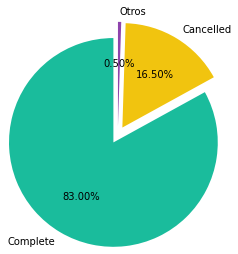

In [28]:

print(" Grafico circular para el año 2016 respecto al status de las licitaciones")

#DEFINIMOS ETIQUETAS  
etiquetas = ['Complete', 'Cancelled', 'Otros'] #labels

#PORCENTAJE DE CADA PORCIÓN.
porcentas = [83, 16.5, 0.5]

#DEFIMIMOS COLORES
colores = ['#1abc9c', '#f1c40f', '#8e44ad', '#e74c3c', '#34495e', '#3498db'] #LabelColor

#DIBUJAMOS GRÁFICA.  
plt.pie(porcentas, labels = etiquetas, colors=colores,
        startangle=90, explode = (0.1, 0.1, 0.1),
        radius = 1.2, autopct = '%1.2f%%')

#TITULO
#plt.title('Gráfica Circular')

#MOSTRAMOS GRÁFICA.
plt.show()

 Grafico circular para el año 2020 respecto al status de las licitaciones


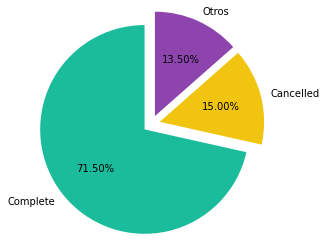

In [29]:
#IMPORTAMOS "matplotlib".
import matplotlib.pyplot as plt 


print(" Grafico circular para el año 2020 respecto al status de las licitaciones")
#DEFINIMOS ETIQUETAS  
etiquetas = ['Complete', 'Cancelled', 'Otros'] #labels

#PORCENTAJE DE CADA PORCIÓN.
porcentas = [71.5, 15, 13.5]

#DEFIMIMOS COLORES
colores = ['#1abc9c', '#f1c40f', '#8e44ad', '#e74c3c', '#34495e', '#3498db'] #LabelColor

#DIBUJAMOS GRÁFICA.  
plt.pie(porcentas, labels = etiquetas, colors=colores,
        startangle=90, explode = (0.1, 0.1, 0.1),
        radius = 1.2, autopct = '%1.2f%%')

#TITULO
#plt.title('Gráfica Circular')

#MOSTRAMOS GRÁFICA.
plt.show()

Según la gráfica realizada, con los datos obtenidos del status del proyecto de la licitación, se nota que al menos un 16% de las actividades fueron canceladas en el 2016 y 2020. 

A continuación se graficó los días promedio para las actividades con menos de 3 o igual 3 oferentes, además de mostrar el promeido de días obtenido. 

 Días con la kicitación abierta en el 2016


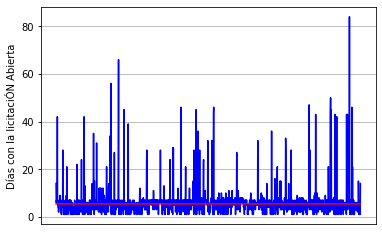

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt 

print(" Días con la kicitación abierta en el 2016")
mediaArr = []
for i in range(len(llave_bien)):
    mediaArr.append(media20)
    
    
plt.title('')
x = llave_bien
y = dia_bien
plt.grid(True)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.xlabel("Actividades de licitación")
plt.ylabel("Días con la licitaciÓN Abierta")
plt.plot(x,y, 'b-', x, mediaArr, 'r-')
plt.show()
plt.clf()




 Días con la kicitación abierta en el 2020


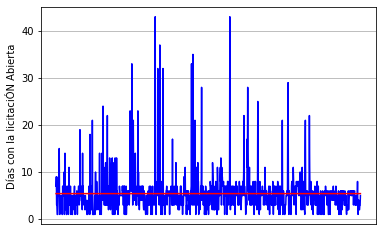

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt 

print(" Días con la kicitación abierta en el 2020")
mediaArr = []
for i in range(len(llave_bien20)):
    mediaArr.append(media20)
    
    
plt.title('')
x = llave_bien20
y = dia_bien20
plt.grid(True)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.xlabel("Actividades de licitación")
plt.ylabel("Días con la licitaciÓN Abierta")
plt.plot(x,y, 'b-', x, mediaArr, 'r-')
plt.show()
plt.clf()

In [40]:
print(" Algunos datos importantes para las conclusiones: \n")

print(" Cantidad de licitaciones en el 2016 con tres o menos oferentes:", len(key))
print(" Cantidad de licitaciones en el 2016 con cuatro o más  oferentes:", len(keyM))


print(" Cantidad de licitaciones en el 2020 con tres o menos oferentes:", len(key20))
print(" Cantidad de licitaciones en el 2020 con cuatro o más  oferentes:", len(key20M))

 Algunos datos importantes para las conclusiones: 

 Cantidad de licitaciones en el 2016 con tres o menos oferentes: 1581
 Cantidad de licitaciones en el 2016 con cuatro o más  oferentes: 891
 Cantidad de licitaciones en el 2020 con tres o menos oferentes: 1145
 Cantidad de licitaciones en el 2020 con cuatro o más  oferentes: 838


## Conclusiones

* En los dos años de estudio notamos que la cantidad de licitaciones con menos de 3 oferentes es mayor que la cantidad de licitaciones con más de 3 oferentes. 

Por lo que se insta y se desea mejorar la divulgación y el involucramiento de nuevas empresas en los procesos de licitación pública. Es importante apoyar, guiar y promover la participación de pequeñas y medianas empresas en estos procesos de licitación, para reactivar la economía en el sector laboral de estas empresas en crecimiento, además de divulgar correctamente las fechas de licitación.

* El promedio de días por licitación no afecta con mayor peso en la cantidad de oferentes por licitación.

Se puede apreciar en los datos para ambos años en análisis (2016 y 2020 ) que tanto con 3 o menos oferentes, así como con 4 oferentes o más el promedio por licitación ronda los 6 días, se omite las licitaciones que tachamos como erróneas, a las cuales es necesario hacerles un estudio aparte para determinar si los días negativos, o los días con más de 1000 afectan en el peso de la media generada con los días.

Se proyecta que para estudios futuros con respecto a la cantidad de oferentes por licitación es importante analizar otro tipo de factores como la naturaleza de las licitaciones para encontrar factores más determinantes.


## Anexos

Se presentan las imagenes de las tablas obtenidas en la visualización de datos realizadas en Tableau, Para complementar con los datos obtenidos en python con las distintas funciones:

#### Cantidad de Oferentes 
<img align='center' src='https://i.imgur.com/pPV4DeD.png' width ='450'/>


#### Gráfico Cantidad de Oferentes 
<img align='center' src='https://i.imgur.com/tTVaOKd.png' width ='800'/>


#### Ejemplo de fechas de licitación
<img align='center' src='https://i.imgur.com/UXux4TS.png' width ='800'/>

#### Ejemplo de precios y oferentes
<img align='center' src='https://i.imgur.com/69c8WNr.png' width ='800'/>